

<center>Rencontre Polytechnique - Enseignants du secondaire</center>
<center>Lucas Gerin <a href="mailto:lucas.gerin@polytechnique.edu">(écrire)</a></center>

# Maths expérimentales : Suites définies par $u_{n+1}=f(u_n)$

Cette session se place dans le contexte suivant :
* Terminale Voie Générale (Spécialité)
 - Analyse
   * Continuité des fonctions d’une variable réelle : "Pour une fonction continue $f$ d’un intervalle dans lui-même, étudier une suite définie par une relation de récurrence  $u_{n+1}=f(u_n)$."
   
Nous allons traiter expérimentalement un exemple particulier. A la fin nous ferons une petite discussion sur la possibilité de prouver <i>avec l'ordinateur</i> les différentes conjectures.

## Sommaire

- [Tracer des trajectoires](#Trajectoires)
- [L'escargot](#Escargot)
- [Vers une preuve assistée par ordinateur?](#Preuve)

In [1]:
# Cette cellule sert à faire un bel affichage du notebook 
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom2.css").read()
    return HTML(styles)
css_styling()


In [2]:
# On charge les librairies Python

import matplotlib.pyplot as plt # Pour tracer des graphiques
import numpy as np              # Pour faire des maths

# Cette commande demande que les sorties graphiques soient dans la fenêtre principale
%matplotlib inline   


In [3]:
# Librairies spéciales pour pouvoir créer des boutons interactifs ("widgets")
from ipywidgets import widgets
from ipywidgets import interact
from IPython.display import display


<a id="Trajectoires"></a>
# Tracer des trajectoires

### Un exemple de suite périodique

Nous allons travailler avec l'exemple de la suite définie par récurrence de la façon suivante :

$$
\begin{cases}
u_0&= a\\
u_{n}&=f(u_{n-1})\qquad \text{pour tout }n\geq 1,
\end{cases}
$$
où $a\neq -1,1$ est un paramètre et
$$
f(x)=\frac{1+x}{1-x}.
$$

L'objectif est de déterminer expérimentalement le comportement de la suite $(u_n)$.


On commence par définir la fonction $f$ en Python :

In [4]:
def f(x):
    return (1+x)/(1-x)


On peut afficher des valeurs :

In [5]:
print(f(4))
print(f(0))

-1.6666666666666667
1.0


La fonction suivante `Suite_u()` permet de calculer le $n$-ème terme de la suite, elle prend deux arguments : l'indice `n` et le paramètre `a` qui est le premier terme.

Ne pas hésiter à faire varier $a$!

In [6]:
def Suite_u(n,a):
    # paramètres : n=indice, a= 1er terme
    if n==0:  # Si n=0 alors on renvoie a
        return a
    else:     # Sinon on applique la récurrence
        return f(Suite_u(n-1,a))

# Test 
a=0.7 # valeur du paramètre
n_max=10 # n jusqu'auquel on affiche

for n in range(n_max+1): # On affiche les n_max premières valeurs
    print('Pour n = '+str(n)+', on a u_n = '+str(Suite_u(n,a)))

Pour n = 0, on a u_n = 0.7
Pour n = 1, on a u_n = 5.666666666666666
Pour n = 2, on a u_n = -1.4285714285714286
Pour n = 3, on a u_n = -0.1764705882352941
Pour n = 4, on a u_n = 0.7
Pour n = 5, on a u_n = 5.666666666666666
Pour n = 6, on a u_n = -1.4285714285714286
Pour n = 7, on a u_n = -0.1764705882352941
Pour n = 8, on a u_n = 0.7
Pour n = 9, on a u_n = 5.666666666666666
Pour n = 10, on a u_n = -1.4285714285714286


C'est bien sûr plus visuel de tracer quelques trajectoires de $n\mapsto u_n$. Voici un code qui permet de le faire, tout en faisant varier le paramètre $a$.

In [7]:
n=15
def TracerTrajectoires(a):
    N = range(n)
    u_n=[Suite_u(n,a) for n in N]  # On calcule u(1),...,u(n)
    plt.figure(dpi=100)             # choix de la résolution de l'image
    plt.plot(N,u_n,'o-')            # on trace les valeurs, représentées par des points (c'est le rôle de "o-")
    plt.xlabel('Indice n'),plt.ylabel('Valeur de u_n')
    plt.show()

interact(TracerTrajectoires,a=(0.0071,3,0.11))  # On lance la fonction avec un "widget" pour choisir a

interactive(children=(FloatSlider(value=1.4371, description='a', max=3.0, min=0.0071, step=0.11), Output()), _…

<function __main__.TracerTrajectoires(a)>

Il semble maintenant assez clair que pour tout $a\neq -1,1$, la suite $(u_n)$ est périodique de période $4$.<br>
<i>(Ou éventuellement de période $2$ pour certaines valeurs de $a$, mais c'est difficile à deviner pour l'instant.)</i>


Pour démontrer ceci il "suffirait" de montrer que $f\circ f\circ f\circ f(x)=x$ pour tout $x$. En effet on aurait alors pour tout $n\geq 0$,
$$
u_{n+4}=f(u_{n+3})=f(f(u_{n+2}))=f(f(f(u_{n+1})))=f(f(f(f(u_n))))=u_n.
$$

Le code suivant trace $f,f\circ f,f\circ f\circ f$ et $f\circ f\circ f\circ f$. On commence par écrire une fonction récursive `Itereef(x,k)` qui calcule l'itérée $k$ fois de $f$ en $x$.

In [8]:
def Itereef(x,k):
    # renvoie f^k(x) (f itérée k fois)
    if k==1:
        return f(x)
    else:
        return f(Itereef(x,k-1))


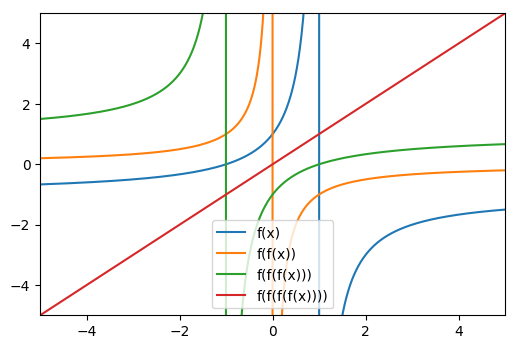

In [9]:
xmin=-5
xmax=5

X=np.arange(xmin,xmax,0.011)
f1=[f(x) for x in X]    
f2=[Itereef(x,2) for x in X]    
f3=[Itereef(x,3) for x in X]    
f4=[Itereef(x,4) for x in X]    

plt.figure(dpi=100)
plt.axis([-5,5,-5,5])
plt.plot(X,f1,label='f(x)')
plt.plot(X,f2,label='f(f(x))')
plt.plot(X,f3,label='f(f(f(x)))')
plt.plot(X,f4,label='f(f(f(f(x))))')

plt.legend(loc='best') # mettre la légende au meilleur endroit!
plt.show()

<div markdown=1 class="Rmk"> On observe en particulier que $f\circ f$ n'a pas de point de fixe : sur le graphique ci-dessus il n'existe pas de $x$ tel que
$$
f\circ f(x)=x.
$$
On en déduit ainsi qu'il n'existe pas de $a$ tel que $(u_n)$ soit de période $2$.



<a id='Escargot'></a>
# Tracer l'escargot

In [10]:

xmin=-8
xmax=8
ymin=-8
ymax=8
amin=0.1
amax=1.6

def snail(a,n):
    # a = valeur initiale
    # xmin,xmax = intervalle des x
    # n = nombre d'étapes de l'escargot
    u = a
    X=np.arange(xmin,xmax,0.01)
    plt.figure(dpi=100)
    plt.axis([xmin,xmax,ymin,ymax])
    plt.plot(X, X, xmin, xmax, color='gray')
    plt.plot([u,u],[ymin,f(u)],'r--')
    for i in range(n):
        plt.plot([u,u],[u,f(u)],color='red')
        plt.plot([u,f(u)],[f(u),f(u)],color='red')
        u = f(u)
    plt.plot(X, [f(x) for x in X],color='blue')
    plt.title('Trajectoire de u_n en partant de a')
    plt.show
       
interact(snail,a=(amin,amax,0.05),n=(2,15))
        

interactive(children=(FloatSlider(value=0.85, description='a', max=1.6, min=0.1, step=0.05), IntSlider(value=8…

<function __main__.snail(a, n)>

<div markdown=1 class="DoIt"> 
Modifier la fonction $f$ définie au début et prendre
$$
f(x)=\frac{1+0,9\times x}{1-x}.
$$
Relancer toutes les cellules, qu'observe-t-on?

<a id='Preuve'></a>
# Vers une preuve assistée par ordinateur?


Les différentes représentations de l'évolution de $(u_n)$ que nous venons de voir ne laissent aucun doute sur le fait que la suite est bien périodique. Il ne s'agit pas d'une preuve bien sûr, mais on peut demander à Python de le faire pour nous, en utilisant le <i>calcul formel</i>.

En effet Python dispose d'une boîte à outils pour le calcul formel : `SymPy` (pour **Sym**bolic **Py**thon). Il faut d'abord importer `SymPy` :

In [75]:
import sympy as sympy

On peut ensuite introduire des variables et expressions autour de ces variables :

In [76]:
sympy.var('x')  # déclare la variable x
ExempleExpression = (x**2-1)/(x+1)
print(ExempleExpression)

(x**2 - 1)/(x + 1)


On peut ensuite simplifier ces expressions avec la fonction `sympy.simplify`

In [77]:
ExempleSimplifie=sympy.simplify(ExempleExpression)
print(ExempleSimplifie)

x - 1


Pour notre exemple nous allons démontrer que $(u_n)$ est périodique en montrant que pour tout $x\neq -1,1$,
$$
f\circ f\circ f\circ f(x)=x
$$

In [78]:
Expression_f=f(x)
Expression_f2=sympy.simplify(f(Expression_f))
print(' f iteree deux fois = '+str(Expression_f2))
Expression_f3=sympy.simplify(f(Expression_f2))
print(' f iteree trois fois = '+str(Expression_f3))
Expression_f4=sympy.simplify(f(Expression_f3))
print(' f iteree quatre fois = '+str(Expression_f4))


 f iteree deux fois = -1/x
 f iteree trois fois = (x - 1)/(x + 1)
 f iteree quatre fois = x


Si on fait confiance à `SymPy`, la preuve est donc faite!

<div markdown=1 class="Rmk"> On avait également conjecturé qu'il n'existe aucun $a$ tel que $(u_n)$ est de période $2$. Nous pouvons également le démontrer en utilisant le calcul fait par `SymPy` car on obtient $f\circ f(x)=-1/x$, qui n'a pas de point fixe.